In [1]:
import time
start_time=time.time()

In [2]:
import sys
from pathlib import Path
import json
import numpy as np
import strucfunc
import matplotlib.pyplot as plt
import time
from astropy.io import fits
import pandas as pd
import seaborn as sns
import math
import sys
import os
from sabreMod import sosf,sosfh
from scipy import interpolate
import itertools


plt.rcParams["font.family"]="Times New Roman"
plt.rcParams["font.size"]="20"

604

In [3]:
Sample='604'

samples=pd.read_csv('SampleList//'+Sample+'.csv',header=None)

N1N=dict()
N1=dict()


for i in range(len(samples)):
    N1N[i]=samples[0][i]
    
for i in range(len(samples)):
    N1[i]=pd.read_csv('SFdata//'+N1N[i]+'.csv')    

samples

,0
0,1997MT604
1,2019Mk604


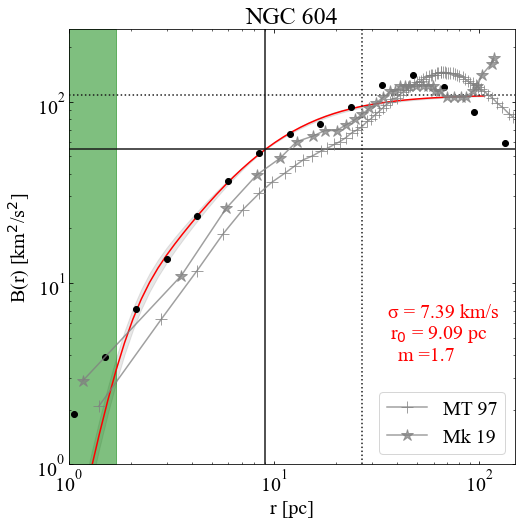

In [4]:
def bfunc(r, r0, sig2, m, s0):
    "Theoretical structure function"
    C = 1.0 / (1.0 + (r/r0)**m)
    a = (np.tanh((r/s0)**2))**2
    return 2.0*a*sig2*(1 - C)

data = json.load(open("SFdata//604.json"))

sns.set_color_codes()
fig, ax = plt.subplots(figsize=(8, 8))


pixscale = 0.26 # arcsec
pixscale *= 4.09              # parsec
r = pixscale * 10**np.array(data["log10 r"])
B = np.array(data["Unweighted B(r)"])
sig2 = data["Unweighted sigma^2"]
B_w = np.array(data["Weighted B(r)"])
sig2_w = data["Weighted sigma^2"]

# Plot fit to unweighted strucfunc
rgrid = pixscale * np.logspace(0.0, 2)
r0 = np.interp(sig2, B, r)
#r2 = np.interp((2*sig2), B, r)
m = 1.7
s0 = 4.09/2.355                    # parsec
flabel = rf"$m = {m:.2f}$, $r_0 = {r0:.1f}$ pc, $\sigma^2 = {sig2:.0f}$ (km/s)$^2$"
ax.fill_between(
    rgrid,
    bfunc(rgrid, r0,sig2, m - 0.1, s0),
    bfunc(rgrid, r0,sig2, m + 0.1, s0),
    color="k", alpha=0.1,
)
ax.plot(rgrid, bfunc(rgrid, r0, sig2, m, s0), color="red")

# Plot points from unweighted strucfunc
ax.plot(r, B, 'o',  color='black')

ax.axhline(sig2, color="k", ls="-")
ax.axvline(x=r0, color='k', linestyle='-')

ax.axhline(2*sig2, color="k", ls=":")
ax.axvline(x=27, color='k', linestyle=':')


ax.set(
    xscale = "log",
    yscale = "log",
    ylim  = [1, 250],
    xlim  = [1, 150],
    xlabel = "r [pc]",
    ylabel = r"B(r) [km$^{2}$/s$^{2}$]",
)


ax.text(0.8, 0.25,'m ='+str(m), ha='center', va='center', transform=ax.transAxes, color='red')
ax.text(0.83, 0.30,'r$_{0}$ = '+str(np.round(r0,2))+' pc', ha='center', va='center', transform=ax.transAxes, color='red')
ax.text(0.84, 0.35,'σ = ' +str(np.round(sig2**(0.5),2)) + ' km/s', ha='center', va='center', transform=ax.transAxes, color='red')

plt.loglog(N1[0].pc,N1[0].S,marker='+',color="gray",alpha=0.75,label="MT 97",markersize="12")
plt.loglog(N1[1].pc,N1[1].S,marker='*',color="gray",alpha=0.75,label="Mk 19",markersize="12")


plt.title('NGC 604')

xs=np.linspace(1,4/2.355  ,10)
ys=np.linspace(1,4,10)

ax.fill_between(xs, 0, 1, where=ys > 0.5,
                color='green', alpha=0.5, transform=ax.get_xaxis_transform())

plt.tick_params(which='both', labelright=False, direction='in', right=True,  top=True)


#fig.tight_layout()
#sns.despine()

plt.legend()
plt.rcParams["font.family"]="Times New Roman"
plt.rcParams["font.size"]="21"


fig.savefig('SFplots//604.pdf', bbox_inches='tight')

In [5]:
r.max()/r0

14.725062749295018

595

In [6]:
Sample='595'

samples=pd.read_csv('SampleList//'+Sample+'.csv',header=None)

N2N=dict()
N2=dict()


for i in range(len(samples)):
    N2N[i]=samples[0][i]
    
for i in range(len(samples)):
    N2[i]=pd.read_csv('SFdata//'+N2N[i]+'.csv')    

samples

,0
0,2009Lagr595H
1,2011Lagr595H


No handles with labels found to put in legend.


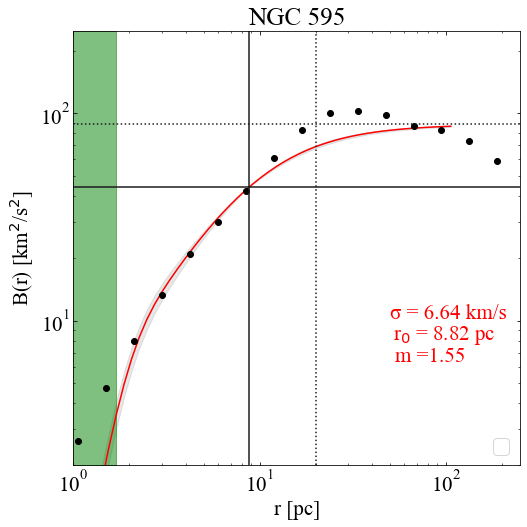

In [7]:
def bfunc(r, r0, sig2, m, s0):
    "Theoretical structure function"
    C = 1.0 / (1.0 + (r/r0)**m)
    a = (np.tanh((r/s0)**2))**2
    return 2.0*a*sig2*(1 - C)

data = json.load(open("SFdata//595.json"))

sns.set_color_codes()
fig, ax = plt.subplots(figsize=(8, 8))


pixscale = 0.26 # arcsec
pixscale *= 4.09              # parsec
r = pixscale * 10**np.array(data["log10 r"])
B = np.array(data["Unweighted B(r)"])
sig2 = data["Unweighted sigma^2"]
B_w = np.array(data["Weighted B(r)"])
sig2_w = data["Weighted sigma^2"]

# Plot fit to unweighted strucfunc
rgrid = pixscale * np.logspace(0.0, 2)
r0 = np.interp(sig2, B, r)
#r2 = np.interp(2*sig2, B, r)
m = 1.55
s0 = 4.09/2.355                      # parsec
flabel = rf"$m = {m:.2f}$, $r_0 = {r0:.1f}$ pc, $\sigma^2 = {sig2:.0f}$ (km/s)$^2$"
ax.fill_between(
    rgrid,
    bfunc(rgrid, r0, sig2, m - 0.1, s0),
    bfunc(rgrid, r0, sig2, m + 0.1, s0),
    color="k", alpha=0.1,
)
ax.plot(rgrid, bfunc(rgrid, r0, sig2, m, s0), color="red")

# Plot points from unweighted strucfunc
ax.plot(r, B, 'o',  color='black')

ax.axhline(sig2, color="k", ls="-")
ax.axvline(r0, color='k', linestyle='-')

ax.axhline(2*sig2, color="k", ls=":")
ax.axvline(20, color='k', linestyle=':')

ax.set(
    xscale = "log",
    yscale = "log",
    ylim  = [2, 250],
    xlim  = [1, 250],
    xlabel = "r [pc]",
    ylabel = r"B(r) [km$^{2}$/s$^{2}$]",
)

ax.text(0.8, 0.25,'m ='+str(m), ha='center', va='center', transform=ax.transAxes, color='red')
ax.text(0.83, 0.30,'r$_{0}$ = '+str(np.round(r0,2))+' pc', ha='center', va='center', transform=ax.transAxes, color='red')
ax.text(0.84, 0.35,'σ = ' +str(np.round(sig2**(0.5),2)) + ' km/s', ha='center', va='center', transform=ax.transAxes, color='red')

#plt.loglog(N2[0].pc,N2[0].S,marker='+',color="gray",alpha=0.75,label="Lg 09",markersize="12")
#plt.loglog(N2[1].pc,N2[1].S*5.92**2,marker='*',color="gray",alpha=0.75,label="Lg 11",markersize="12")


plt.title('NGC 595')

xs=np.linspace(1,4/2.355  ,10)
ys=np.linspace(1,4,10)

ax.fill_between(xs, 0, 1, where=ys > 0.5,
                color='green', alpha=0.5, transform=ax.get_xaxis_transform())

plt.tick_params(which='both', labelright=False, direction='in', right=True,  top=True)

#fig.tight_layout()
#sns.despine()

plt.legend(loc='lower right')
plt.rcParams["font.family"]="Times New Roman"
plt.rcParams["font.size"]="21"

fig.savefig('SFplots//595.pdf', bbox_inches='tight')

In [8]:
r.max()/r0

21.44499517867262

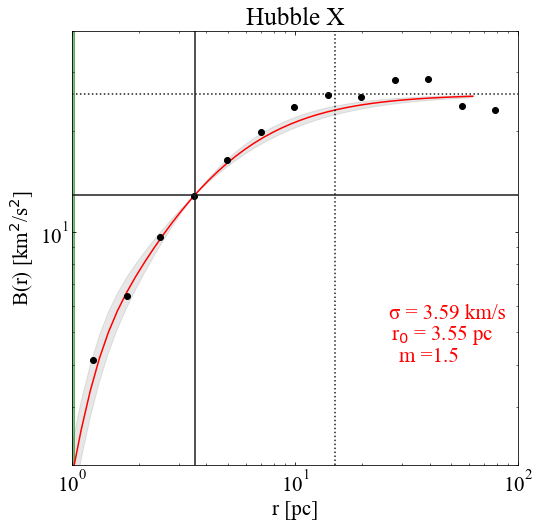

In [9]:
def bfunc(r, r0, sig2, m, s0):
    "Theoretical structure function"
    C = 1.0 / (1.0 + (r/r0)**m)
    a = (np.tanh((r/s0)**2))**2
    return 2.0*a*sig2*(1 - C)

data = json.load(open("SFdata//HX.json"))

sns.set_color_codes()
fig, ax = plt.subplots(figsize=(8, 8))


pixscale = 0.26 # arcsec
pixscale *= 2.4              # parsec
r = pixscale * 10**np.array(data["log10 r"])
B = np.array(data["Unweighted B(r)"])
sig2 = data["Unweighted sigma^2"]
B_w = np.array(data["Weighted B(r)"])
sig2_w = data["Weighted sigma^2"]

# Plot fit to unweighted strucfunc
rgrid = pixscale * np.logspace(0.0, 2)
r0 = np.interp(sig2, B, r)
r2 = np.interp(2*sig2, B, r)

m = 1.5
s0 = 2.4/2.355                      # parsec
flabel = rf"$m = {m:.2f}$, $r_0 = {r0:.1f}$ pc, $\sigma^2 = {sig2:.0f}$ (km/s)$^2$"
ax.fill_between(
    rgrid,
    bfunc(rgrid, r0, sig2, m - 0.2, s0),
    bfunc(rgrid, r0, sig2, m + 0.2, s0),
    color="k", alpha=0.1,
)
ax.plot(rgrid, bfunc(rgrid, r0, sig2, m, s0), color="red")

# Plot points from unweighted strucfunc
ax.plot(r, B, 'o',  color='black')

ax.axhline(sig2, color="k", ls="-")
plt.axvline(r0, color='k', linestyle='-')

ax.axhline(2*sig2, color="k", ls=":")
ax.axvline(15, color='k', linestyle=':')

ax.set(
    xscale = "log",
    yscale = "log",
    ylim  = [2, 40],
    xlim  = [1, 100],
    xlabel = "r [pc]",
    ylabel = r"B(r) [km$^{2}$/s$^{2}$]",
)

ax.text(0.8, 0.25,'m ='+str(m), ha='center', va='center', transform=ax.transAxes, color='red')
ax.text(0.83, 0.30,'r$_{0}$ = '+str(np.round(r0,2))+' pc', ha='center', va='center', transform=ax.transAxes, color='red')
ax.text(0.84, 0.35,'σ = ' +str(np.round(sig2**(0.5),2)) + ' km/s', ha='center', va='center', transform=ax.transAxes, color='red')

#plt.loglog(Tar[0].pc,Tar[0].S,marker='+',color="gray",alpha=0.65,label="Feast",markersize="12")
#plt.loglog(Tar[1].pc,Tar[1].S,marker='*',color="gray",alpha=0.65,label="Melnick",markersize="12")


plt.title('Hubble X')

xs=np.linspace(1,2.4/2.355  ,10)
ys=np.linspace(1,4,10)

ax.fill_between(xs, 0, 1, where=ys > 0.5,
                color='green', alpha=0.5, transform=ax.get_xaxis_transform())

plt.tick_params(which='both', labelright=False, direction='in', right=True,  top=True)

#fig.tight_layout()
#sns.despine()

#plt.legend()
plt.rcParams["font.family"]="Times New Roman"
plt.rcParams["font.size"]="21"

fig.savefig('SFplots//hubbleX.pdf', bbox_inches='tight')

In [10]:
sig2**(0.5)

3.591093705937545

In [11]:
r.max()/r0

22.137350223231

Hubble V

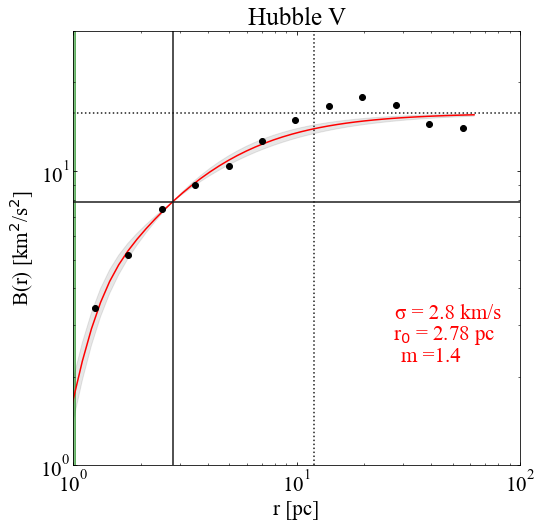

In [12]:
def bfunc(r, r0, sig2, m, s0):
    "Theoretical structure function"
    C = 1.0 / (1.0 + (r/r0)**m)
    a = (np.tanh((r/s0)**2))**2
    return 2.0*a*sig2*(1 - C)

data = json.load(open("SFdata//HV.json"))

sns.set_color_codes()
fig, ax = plt.subplots(figsize=(8, 8))


pixscale = 0.26 # arcsec
pixscale *= 2.4              # parsec
r = pixscale * 10**np.array(data["log10 r"])
B = np.array(data["Unweighted B(r)"])
sig2 = data["Unweighted sigma^2"]
B_w = np.array(data["Weighted B(r)"])
sig2_w = data["Weighted sigma^2"]

# Plot fit to unweighted strucfunc
rgrid = pixscale * np.logspace(0.0, 2)
r0 = np.interp(sig2, B, r)
#r2 = np.interp(2*sig2, B, r)

m = 1.4
s0 = 2.4/2.355                     # parsec
flabel = rf"$m = {m:.2f}$, $r_0 = {r0:.1f}$ pc, $\sigma^2 = {sig2:.0f}$ (km/s)$^2$"
ax.fill_between(
    rgrid,
    bfunc(rgrid, r0, sig2, m - 0.2, s0),
    bfunc(rgrid, r0, sig2, m + 0.2, s0),
    color="k", alpha=0.1,
)
ax.plot(rgrid, bfunc(rgrid, r0, sig2, m, s0), color="red")

# Plot points from unweighted strucfunc
ax.plot(r, B, 'o',  color='black')

ax.axhline(sig2, color="k", ls="-")
plt.axvline(r0, color='k', linestyle='-')

ax.axhline(2*sig2, color="k", ls=":")
ax.axvline(12, color='k', linestyle=':')

ax.set(
    xscale = "log",
    yscale = "log",
    ylim  = [1, 30],
    xlim  = [1, 100],
    xlabel = "r [pc]",
    ylabel = r"B(r) [km$^{2}$/s$^{2}$]",
)

ax.text(0.8, 0.25,'m ='+str(m), ha='center', va='center', transform=ax.transAxes, color='red')
ax.text(0.83, 0.30,'r$_{0}$ = '+str(np.round(r0,2))+' pc', ha='center', va='center', transform=ax.transAxes, color='red')
ax.text(0.84, 0.35,'σ = ' +str(np.round(sig2**(0.5),2)) + ' km/s', ha='center', va='center', transform=ax.transAxes, color='red')


plt.title('Hubble V')

plt.tick_params(which='both', labelright=False, direction='in', right=True,  top=True)

xs=np.linspace(1,2.4/2.355  ,10)
ys=np.linspace(1,4,10)

ax.fill_between(xs, 0, 1, where=ys > 0.5,
                color='green', alpha=0.5, transform=ax.get_xaxis_transform())

#fig.tight_layout()
#sns.despine()

#plt.legend()
plt.rcParams["font.family"]="Times New Roman"
plt.rcParams["font.size"]="21"

fig.savefig('SFplots//hubbleV.pdf', bbox_inches='tight')

In [13]:
sig2**(0.5)

2.8044071111457693

In [14]:
r.max()/r0

19.973961625570894

30 Dor

In [15]:
Sample='tarantula'

samples=pd.read_csv('SampleList//'+Sample+'.csv',header=None)

TarN=dict()
Tar=dict()


for i in range(len(samples)):
    TarN[i]=samples[0][i]
    
for i in range(len(samples)):
    Tar[i]=pd.read_csv('SFdata//'+TarN[i]+'.csv')    

samples

,0
0,1961Fst30Dor
1,2019Mk30Dor


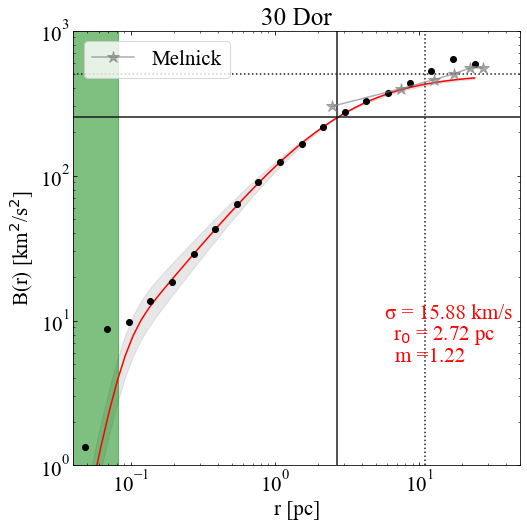

In [16]:
def bfunc(r, r0, sig2, m, s0):
    "Theoretical structure function"
    C = 1.0 / (1.0 + (r/r0)**m)
    a = (np.tanh((r/s0)**2))**2
    return 2.0*a*sig2*(1 - C)

data = json.load(open("SFdata//30Dor.json"))

sns.set_color_codes()
fig, ax = plt.subplots(figsize=(8, 8))

figfile = "tarantula-strucfunc-plot--f.pdf"

pixscale = 0.2 # arcsec
pixscale *= 0.242               # parsec
r = pixscale * 10**np.array(data["log10 r"])
B = np.array(data["Unweighted B(r)"])
sig2 = data["Unweighted sigma^2"]
B_w = np.array(data["Weighted B(r)"])
sig2_w = data["Weighted sigma^2"]

# Plot fit to unweighted strucfunc
rgrid = pixscale * np.logspace(0.0, 2.7)
r0 = np.interp(sig2, B, r)
#r2 = np.interp(2*sig2, B, r)

m = 1.22
s0 = (0.24/2.355)*0.8                    # parsec
flabel = rf"$m = {m:.2f}$, $r_0 = {r0:.1f}$ pc, $\sigma^2 = {sig2:.0f}$ (km/s)$^2$"
ax.fill_between(
    rgrid,
    bfunc(rgrid, r0, sig2, m - 0.1, s0),
    bfunc(rgrid, r0, sig2, m + 0.1, s0),
    color="k", alpha=0.1,
)
ax.plot(rgrid, bfunc(rgrid, r0, sig2, m, s0), color="red")

# Plot points from unweighted strucfunc
ax.plot(r, B, 'o',  color='black')

ax.axhline(sig2, color="k", ls="-")
plt.axvline(x=2.7, color='k', linestyle='-')

ax.axhline(2*sig2, color="k", ls=":")
ax.axvline(11, color='k', linestyle=':')

ax.set(
    xscale = "log",
    yscale = "log",
    ylim  = [1, 1000],
    xlim  = [0.04, 50],
    xlabel = "r [pc]",
    ylabel = r"B(r) [km$^{2}$/s$^{2}$]",
)

ax.text(0.8, 0.25,'m ='+str(m), ha='center', va='center', transform=ax.transAxes, color='red')
ax.text(0.83, 0.30,'r$_{0}$ = '+str(np.round(r0,2))+' pc', ha='center', va='center', transform=ax.transAxes, color='red')
ax.text(0.84, 0.35,'σ = ' +str(np.round(sig2**(0.5),2)) + ' km/s', ha='center', va='center', transform=ax.transAxes, color='red')


#plt.loglog(Tar[0].pc,Tar[0].S,marker='+',color="gray",alpha=0.65,label="Feast",markersize="12")
plt.loglog(Tar[1].pc,Tar[1].S,marker='*',color="gray",alpha=0.65,label="Melnick",markersize="12")

#melnick_r = np.array([2.5, 7.5, 12.5, 17.5, 22.5, 27.5])
#melnick_B = np.array([2.0, 2.1, 2.2, 2.2, 2.25, 2.25]) * 18.2**2
#ax.plot(melnick_r, melnick_B, 's', label="Melnick+ (2020)", color="y", zorder=-10)

plt.title('30 Dor')

xs=np.linspace(0.0,(0.24/2.355)*0.8  ,10)
ys=np.linspace(0.0,4,10)

ax.fill_between(xs, 0, 1, where=ys > 0.5,
                color='green', alpha=0.5, transform=ax.get_xaxis_transform())

plt.tick_params(which='both', labelright=False, direction='in', right=True,  top=True)

plt.tick_params(which='both', labelright=False, direction='in', right=True,  top=True)

#fig.tight_layout()
#sns.despine()

plt.legend()
plt.rcParams["font.family"]="Times New Roman"
plt.rcParams["font.size"]="21"

fig.savefig('SFplots//tarantula.pdf', bbox_inches='tight')

In [17]:
sig2**(0.5)

15.878086538378106

In [18]:
r.max()/r0

8.912361442296874

Carina

In [19]:
Sample='carina'

samples=pd.read_csv('SampleList//'+Sample+'.csv',header=None)

CarN=dict()
Car=dict()


for i in range(len(samples)):
    CarN[i]=samples[0][i]
    
for i in range(len(samples)):
    Car[i]=pd.read_csv('SFdata//'+CarN[i]+'.csv')    

samples

,0
0,CarB2
1,CarR2
2,Car2


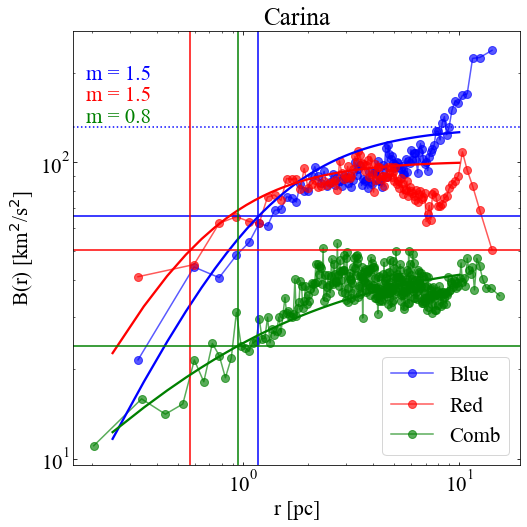

In [20]:
fig, ax=plt.subplots(figsize=(8,8))

plt.loglog(Car[0].pc,Car[0].S,marker='o',color="blue",alpha=0.65,label="Blue",markersize="8")
plt.loglog(Car[1].pc,Car[1].S,marker='o',color="red",alpha=0.65,label="Red",markersize="8")
plt.loglog(Car[2].pc,Car[2].S,marker='o',color="green",alpha=0.65,label="Comb",markersize="8")

plt.axhline(y=8.1**2, color='blue', linestyle='-')
plt.axvline(x=1.18, color='blue', linestyle='-')
plt.axhline(y=2*8.1**2, color='blue', linestyle=':')

lo=1.18
ss=8.1**2
n=1.5
x=np.linspace(0.25,10,100)
c=1/(1+(x/lo)**n)
y=2*(1-c)*ss
plt.loglog(x,y,color='blue', linestyle='-',linewidth='2.3')


plt.axhline(y=7.1**2, color='red', linestyle='-')
plt.axvline(x=0.57, color='red', linestyle='-')

lo=0.57
ss=7.1**2
n=1.5
x=np.linspace(0.25,10,100)
c=1/(1+(x/lo)**n)
y=2*(1-c)*ss
plt.loglog(x,y,color='red', linestyle='-',linewidth='2.3')


plt.axhline(y=4.9**2, color='green', linestyle='-')
plt.axvline(x=0.95, color='green', linestyle='-')

lo=0.95
ss=4.9**2
n=0.8
x=np.linspace(0.25,10,100)
c=1/(1+(x/lo)**n)
y=2*(1-c)*ss
plt.loglog(x,y,color='green', linestyle='-',linewidth='2.3')

plt.legend()
plt.title('Carina')

ax.text(0.1, 0.9,'m = 1.5', ha='center', va='center', transform=ax.transAxes, color='blue')
ax.text(0.1, 0.85,'m = 1.5', ha='center', va='center', transform=ax.transAxes, color='red')
ax.text(0.1, 0.8,'m = 0.8', ha='center', va='center', transform=ax.transAxes, color='green')


ax.set(xlabel='r [pc]', ylabel='B(r) [km$^{2}$/s$^{2}$]')
plt.tick_params(which='both', labelright=False, direction='in', right=True,  top=True)
#plt.grid(which='minor')

plt.rcParams["font.family"]="Times New Roman"
plt.rcParams["font.size"]="21"

fig.savefig('SFplots//carina.pdf', bbox_inches='tight')

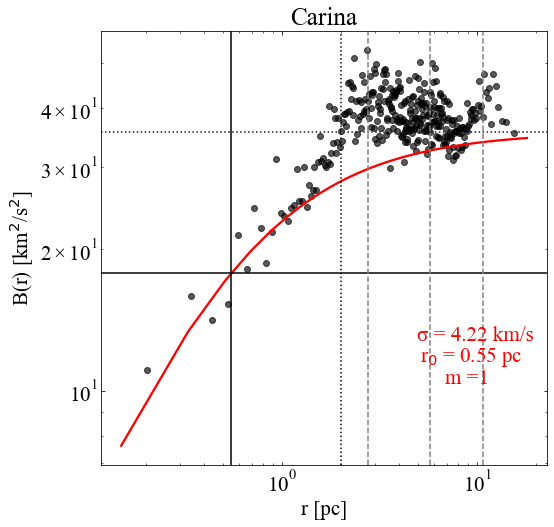

In [21]:
fig, ax=plt.subplots(figsize=(8,8))

plt.scatter(Car[2].pc,Car[2].S,marker='o',color="black",alpha=0.65,label="Comb")

l0=0.55
ss=np.round(4.22**2,2)
n=1

x=np.linspace(0.15,18,100)
c=1/(1+(x/l0)**n)
y=2*(1-c)*ss
plt.loglog(x,y,color='red', linestyle='-',linewidth='2.3')

#r2 = np.interp(2*ss, Car[2].S, Car[2].pc)
#r2

ax.axhline(2*ss, color="k", ls=":")
plt.axvline(x=2, color='black', linestyle=':')

plt.axhline(y=ss, color='black', linestyle='-')
plt.axvline(x=l0, color='black', linestyle='-')


plt.axvline(x=2.75, color='gray', linestyle='--')
plt.axvline(x=5.75, color='gray', linestyle='--')
plt.axvline(x=10.75, color='gray', linestyle='--')


#plt.legend()
plt.title('Carina')

#xs=np.linspace(0.0,0.011,10)
#ys=np.linspace(0.0,4,10)
#ax.fill_between(xs, 0, 1, where=ys > 0.5,color='green', alpha=0.5, transform=ax.get_xaxis_transform())

ax.text(0.84, 0.30,'σ = ' +str(np.round(ss**0.5,2)) + ' km/s', ha='center', va='center', transform=ax.transAxes, color='red')
ax.text(0.83, 0.25,'r$_{0}$ = '+str(l0)+' pc', ha='center', va='center', transform=ax.transAxes, color='red')
ax.text(0.82, 0.20,'m ='+str(n), ha='center', va='center', transform=ax.transAxes, color='red')

ax.set(xlabel='r [pc]', ylabel='B(r) [km$^{2}$/s$^{2}$]')
plt.tick_params(which='both', labelright=False, direction='in', right=True,  top=True)
#plt.grid(which='minor')

plt.rcParams["font.family"]="Times New Roman"
plt.rcParams["font.size"]="21"

#ax.set_xlim(0.4, 20)
#ax.set_ylim(15, 50)

fig.savefig('SFplots//carina.pdf', bbox_inches='tight')

In [22]:
Car[2].pc.max()/lo

16.179441292534065

M8

In [23]:
Sample='lagoon'

samples=pd.read_csv('SampleList//'+Sample+'.csv',header=None)

M8N=dict()
M8=dict()


for i in range(len(samples)):
    M8N[i]=samples[0][i]
    
for i in range(len(samples)):
    M8[i]=pd.read_csv('SFdata//'+M8N[i]+'.csv')    

samples

,0
0,1987OdCast6523A
1,1987OdCast6523B
2,Lagoon1
3,Lagoon2
4,M8H2


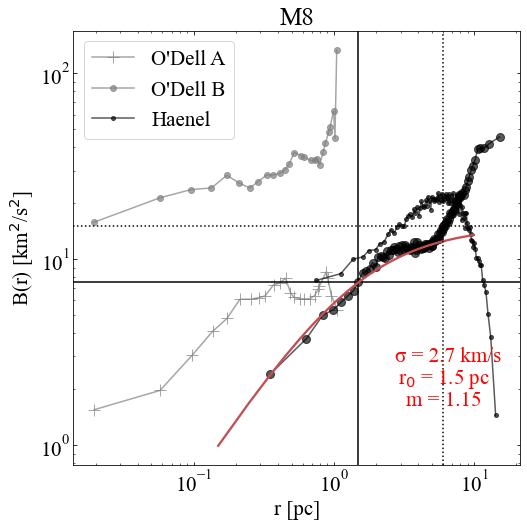

In [24]:
fig, ax=plt.subplots(figsize=(8,8))

plt.loglog(M8[0].pc,M8[0].S,marker='+',color="gray",alpha=0.7,label="O'Dell A",markersize="12")
plt.loglog(M8[1].pc,M8[1].S,marker='.',color="gray",alpha=0.7,label="O'Dell B",markersize="12")
#plt.loglog(M8[2].pc,M8[2].S,marker='o',color="green",alpha=0.15,label="Sf1",markersize="8")
plt.loglog(M8[3].pc,M8[3].S,marker='o',color="black",alpha=0.65,markersize="8")
plt.loglog(M8[4].pc,M8[4].S,marker='.',color="black",alpha=0.65,markersize="8",label="Haenel")


plt.axhline(y=2.74**2, color='black', linestyle='-')
plt.axhline(y=2*2.74**2, color='black', linestyle=':')
plt.axvline(x=1.5, color='black', linestyle='-')


lo=1.5
ss=2.74**2
n=1.15
x=np.linspace(0.15,10,100)
c=1/(1+(x/lo)**n)
y=2*(1-c)*ss
plt.loglog(x,y,color='r', linestyle='-',linewidth='2.3')

r2 = np.interp(2*ss, M8[3].S, M8[3].pc)
r2
plt.axvline(x=r2, color='black', linestyle=':')

plt.legend()
plt.title('M8')

#xs=np.linspace(0.0,0.0063,10)
#ys=np.linspace(0.0,4,10)
#ax.fill_between(xs, 0, 1, where=ys > 0.5,
#                color='green', alpha=0.5, transform=ax.get_xaxis_transform())

ax.text(0.83, 0.15,'m = 1.15', ha='center', va='center', transform=ax.transAxes, color='red')
ax.text(0.83, 0.20,'r$_{0}$ = 1.5 pc', ha='center', va='center', transform=ax.transAxes, color='red')
ax.text(0.84, 0.25,'σ = 2.7 km/s', ha='center', va='center', transform=ax.transAxes, color='red')
    
ax.set(xlabel='r [pc]', ylabel='B(r) [km$^{2}$/s$^{2}$]')
plt.tick_params(which='both', labelright=False, direction='in', right=True,  top=True)
#plt.grid(which='minor')

plt.rcParams["font.family"]="Times New Roman"
plt.rcParams["font.size"]="21"

fig.savefig('SFplots//M8.pdf', bbox_inches='tight')


In [25]:
M8[3].pc.max()/lo

10.159006704249853

In [26]:
r2

6.045975068577767

Orion

In [27]:
Sample='orion'

samples=pd.read_csv('SampleList//'+Sample+'.csv',header=None)

DataNO=dict()
DataO=dict()


for i in range(len(samples)):
    DataNO[i]=samples[0][i]
    
for i in range(len(samples)):
    DataO[i]=pd.read_csv('SFdata//'+DataNO[i]+'.csv')    



samples

,0
0,1951VHOrion1
1,1951VHOrion2
2,1958MchOrion
3,2016ArthOrionH
4,Orion1
5,Orion2


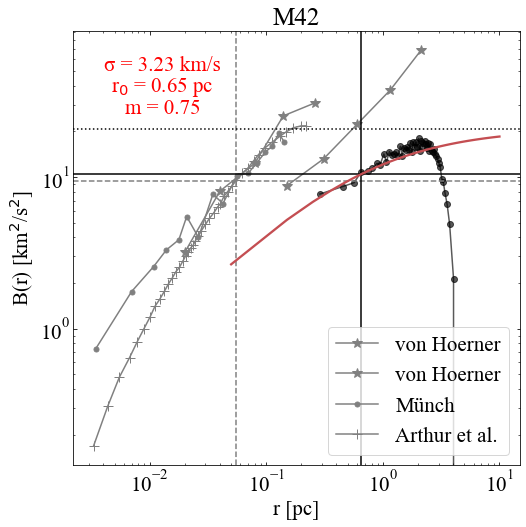

In [28]:
marker=itertools.cycle(('*','*','.','+','o','^'))

fig, ax=plt.subplots(figsize=(8,8))

plt.loglog(DataO[0].pc,DataO[0].S,marker=next(marker),color="gray",alpha=1,label="von Hoerner",markersize="10")
plt.loglog(DataO[1].pc,DataO[1].S,marker=next(marker),color="gray",alpha=1,label="von Hoerner",markersize="10")
plt.loglog(DataO[2].pc,DataO[2].S,marker=next(marker),color="gray",alpha=1,label="Münch",markersize="10")
plt.loglog(DataO[3].pc,DataO[3].S*9.37,marker=next(marker),color="gray",alpha=1,label="Arthur et al.",markersize="10")
#plt.loglog(DataO[4].pc,DataO[4].S,marker=next(marker),color="green",alpha=0.45,label="Sf1")
plt.loglog(DataO[5].pc,DataO[5].S,marker=next(marker),color="black",alpha=0.65)

plt.axhline(y=9.37, color='gray', linestyle='--')
plt.axvline(x=0.055, color='gray', linestyle='--')


plt.axhline(y=3.23**2, color='black', linestyle='-')
plt.axvline(x=0.65, color='black', linestyle='-')

plt.axhline(y=2*3.23**2, color='black', linestyle=':')

lo=0.65
ss=3.23**2
n=0.75
x=np.linspace(0.05,10,100)
c=1/(1+(x/lo)**n)
y=2*(1-c)*ss
plt.loglog(x,y,color='r', linestyle='-',linewidth='2.3')

r2 = np.interp(2*ss, DataO[5].S, DataO[5].pc)
r2
#plt.axvline(x=r2, color='black', linestyle=':')

ax.text(0.2, 0.82,'m = 0.75', ha='center', va='center', transform=ax.transAxes, color='red')
ax.text(0.2, 0.87,'r$_{0}$ = 0.65 pc', ha='center', va='center', transform=ax.transAxes, color='red')
ax.text(0.2, 0.92,'σ = 3.23 km/s', ha='center', va='center', transform=ax.transAxes, color='red')

plt.title('M42')
plt.legend()
    
ax.set(xlabel='r [pc]', ylabel='B(r) [km$^{2}$/s$^{2}$]')
plt.tick_params(which='both', labelright=False, direction='in', right=True,  top=True)
#plt.grid(which='minor')

plt.rcParams["font.family"]="Times New Roman"
plt.rcParams["font.size"]="21"

fig.savefig('SFplots//M42.pdf', bbox_inches='tight')

In [29]:
DataO[5].S.max()/lo

27.610969230769285

In [30]:
print("--- %s seconds ---" % (time.time()-start_time))

--- 15.213242053985596 seconds ---
